<a href="https://colab.research.google.com/github/jinhyukbae/playdata/blob/main/221209_ch02_pandas02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# 데이터프레임에서의 데이터 조작(처리)
> 통계? 정돈? 정리?
* Pandas는 Numpy 2차원 배열에서 가능한 대부분의 데이터 처리
* (+) Pandas만의 데이터 처리 및 변환 관련 함수/기능들을 제공

## 데이터 갯수 세기

### 시리즈의 갯수 세기

In [ ]:
s  = pd.Series(range(10))
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [ ]:
s2  = pd.Series(range(10))
s2.count() # nan이 없음 (모두 가득 차 있음)

10

In [ ]:
s[3] = np.nan # 결측치 - 측정을 했는데 결여된? 없는? 오류난? 값
# 결측치, 이상치, ... 
s # 결측치 1개 포함 (10개 중)

0    0.0
1    1.0
2    2.0
3    NaN
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [ ]:
s.count() # series.count() -> 결측치(nan)를 빼고 세준다

9

### 데이터 프레임의 갯수 세기

In [ ]:
np.random.seed(8)
# np.random.randint(5, size=(4,4)) = int
# dtype이 float인 데이터프레임에다가 넣어준 것
df = pd.DataFrame(np.random.randint(5, size=(4,4)), dtype=float)
# dtype이 float인 4x4 배열로 데이터프레임을 만들어준 것
# randint? 정수형인데 굳이 float 타입 주는 이유가 뭐에요?
# nan이 float 타입임.
# dtype= 직접 타입을 넣어줘서 지정 ('i', 'f'...)
df

,0,1,2,3
0,3.0,4.0,1.0,1.0
1,2.0,0.0,3.0,0.0
2,0.0,4.0,1.0,3.0
3,2.0,3.0,4.0,1.0


In [ ]:
df[3][2] # 기본 인덱싱

3.0

In [ ]:
df.loc[2, 3] # loc

3.0

In [ ]:
df.iloc[2, 3] # iloc - 순서에 기반한 정수 인덱스로 부여 (iloc, loc 결과 같음)

3.0

In [ ]:
df.iloc[2, 3] = np.nan # 갱신, 대입...
df

,0,1,2,3
0,3.0,4.0,1.0,1.0
1,2.0,0.0,3.0,0.0
2,0.0,4.0,1.0,NaN
3,2.0,3.0,4.0,1.0


In [ ]:
df.count() # 열마다의 갯수

0    4
1    4
2    4
3    3
dtype: int64

In [ ]:
df.columns = ['A', 'B', 'C', 'D']
df

,A,B,C,D
0,3.0,4.0,1.0,1.0
1,2.0,0.0,3.0,0.0
2,0.0,4.0,1.0,NaN
3,2.0,3.0,4.0,1.0


In [ ]:
df.count() # 열 이름대로...

A    4
B    4
C    4
D    3
dtype: int64

In [ ]:
df.count(axis=0) # 열방향이 아니라 행방향으로 하고 싶은데?

A    4
B    4
C    4
D    3
dtype: int64

In [ ]:
df.count(axis=1) # 행방향으로 count.

0    4
1    4
2    3
3    4
dtype: int64

In [ ]:
import seaborn as sns # 데이터 시각화 관련 패키지 -> 분석할만한 데이터셋을 내장
titanic = sns.load_dataset('titanic') # pd.read_csv... url...
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic.head() # 상위 5개

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.tail() # 하위 5개

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic.describe() # 통계값 -> 계산가능한 숫자들로 구성된 값들에 대한 통계값
# -> 연속형 변수

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.describe(include='O') # 범주형 변수에 대한 설명

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [ ]:
titanic.describe(include='all') # 모든 변수에 대한 설명값

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 🐱 연습 문제 1
* 타이타닉 승객 데이터의 데이터 개수를 각 열마다 구해보시오

In [ ]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 범주(카테고리) 값 세기
* 시리즈의 값이 정수, 문자열, 카테고리 값인 경우에는 `value_counts` 메소드로 각각의 값이 나온 횟수를 셀 수 있음

In [ ]:
np.random.seed(8)
s2 = pd.Series(np.random.randint(6, size=100)) # randint 6 -> 0~5. 100개를 추출
# 특정한 범위의 정수값을 임의로 추출
s2

0     3
1     4
2     1
3     1
4     5
     ..
95    4
96    0
97    1
98    3
99    2
Length: 100, dtype: int64

In [ ]:
s2.value_counts() # (1) 중복되지 않는 값들만 추려내서 (2) 각 값들의 갯수를 카운팅

3    20
2    19
1    16
5    16
4    15
0    14
dtype: int64

In [ ]:
df.value_counts() # 행이 완전히 다른 애들을 별도로 카운트

A    B    C    D  
2.0  0.0  3.0  0.0    1
     3.0  4.0  1.0    1
3.0  4.0  1.0  1.0    1
dtype: int64

In [ ]:
df['A'].value_counts() # df[열이름].value_counts -> 고유한 값들 -> 카운트

2.0    2
3.0    1
0.0    1
Name: A, dtype: int64

In [ ]:
# 고윳값 배열 # set.
s2.unique() # 고윳값 배열을 리턴

array([3, 4, 1, 5, 2, 0])

In [ ]:
# 고윳값의 개수
s2.nunique()

6

## 정렬 (sort)
* 데이터를 정렬하려면 `sort_index` 또는 `sort_values`
* `sort_index` : 인덱스 값을 기준으로. (정수냐 라벨-문자열)
* `sort_values` : 데이터 값 기준으로 정렬.
> 오름차순 -> 행이 늘어나는 방향 -> 데이터 나열되는 방향으로 -> 데이터가 커지는 방향을 일치시켜주겠다 (ascending)<br>
> 내림차순 -> 데이터가 나열되는 방향 -> 데이터가 커지는 방향을 반대로 하겠다

In [ ]:
s2.value_counts() # 인덱스가 지멋대로, 값기준으로 내림차순

3    20
2    19
1    16
5    16
4    15
0    14
dtype: int64

In [ ]:
s2.value_counts().sort_index() # 오름차순, 인덱스

0    14
1    16
2    19
3    20
4    15
5    16
dtype: int64

In [ ]:
# s2.value_counts().sort_index(ascending=True)
s2.value_counts().sort_index(ascending=False) # 내림차순

5    16
4    15
3    20
2    19
1    16
0    14
dtype: int64

In [ ]:
s

0    0.0
1    1.0
2    2.0
3    NaN
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [ ]:
s.sort_values() # NaN 가장 밑으로 내려감 (na_position=last)
s.sort_values(na_position='first') # Nan이 가장 위로 올라감

3    NaN
0    0.0
1    1.0
2    2.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [ ]:
df

,A,B,C,D
0,3.0,4.0,1.0,1.0
1,2.0,0.0,3.0,0.0
2,0.0,4.0,1.0,NaN
3,2.0,3.0,4.0,1.0


In [ ]:
# 데이터 프레임의 경우에는 sort_values 하고 싶으면 기준이 되는 열의 라벨(이름)을 by로 지정해야한다
# df.sort_values()
df.sort_values(by='A') # 정렬을 하고 싶으면 기준이 되는 열의 위치(라벨)를 내놓아라
df.sort_values(by='C')

,A,B,C,D
0,3.0,4.0,1.0,1.0
2,0.0,4.0,1.0,NaN
1,2.0,0.0,3.0,0.0
3,2.0,3.0,4.0,1.0


In [ ]:
# df.sort_values(by='B') # B를 기준으로 정렬
df.sort_values(by=['B','A']) # B를 기준으로 정렬한 후에, A를 기준으로 추가로 정렬

,A,B,C,D
1,2.0,0.0,3.0,0.0
3,2.0,3.0,4.0,1.0
2,0.0,4.0,1.0,NaN
0,3.0,4.0,1.0,1.0


## 행/열 합계
* numpy? np.sum...?

In [ ]:
np.random.seed(12)
df2 = pd.DataFrame(np.random.randint(10, size=(4, 8)))
df2

,0,1,2,3,4,5,6,7
0,6,1,2,3,3,0,6,1
1,4,5,9,2,6,0,5,8
2,2,9,3,4,3,1,7,0
3,2,6,2,0,4,6,9,0


In [ ]:
# 행 방향 합계 (열 방향 axis=0 / 행 방향 axis=1)
# summary
df2.sum() # 열 기준 (axis=0)
df2.sum(axis=1) # 행 방향 합계

0    22
1    39
2    29
3    29
dtype: int64

In [ ]:
df2['Sum'] = df2.sum(axis=1)
df2

,0,1,2,3,4,5,6,7,Sum
0,6,1,2,3,3,0,6,1,22
1,4,5,9,2,6,0,5,8,39
2,2,9,3,4,3,1,7,0,29
3,2,6,2,0,4,6,9,0,29


In [ ]:
df2.loc['ColSum', :] = df2.sum() # 열 합계
df2

,0,1,2,3,4,5,6,7,Sum
0,6.0,1.0,2.0,3.0,3.0,0.0,6.0,1.0,22.0
1,4.0,5.0,9.0,2.0,6.0,0.0,5.0,8.0,39.0
2,2.0,9.0,3.0,4.0,3.0,1.0,7.0,0.0,29.0
3,2.0,6.0,2.0,0.0,4.0,6.0,9.0,0.0,29.0
ColSum,14.0,21.0,16.0,9.0,16.0,7.0,27.0,9.0,119.0


In [ ]:
# sum : 합계 / mean : 평균
df2.mean() # 열 방향 평균
df2.mean(axis=1) # 행 방향 평균

0          4.888889
1          8.666667
2          6.444444
3          6.444444
ColSum    26.444444
dtype: float64

## 🐱 연습문제 2
1. 타이타닉호 승객의 평균 나이를 구하라.
1. 타이타닉호 승객중 여성 승객의 평균 나이를 구하라.
1. 타이타닉호 승객중 1등실 선실의 여성 승객의 평균 나이를 구하라.

In [ ]:
titanic # 나이는 age / (sex: male=남성, female=여성) / pclass 선실 등급

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# 1. 타이타닉호 승객의 평균 나이를 구하라.
titanic.age.mean()

29.69911764705882

In [ ]:
# 2. 타이타닉호 승객중 여성 승객의 평균 나이를 구하라.
# -1. 여성 승객의 행을 구하기 (여성=sex==female 만족시키는 행들만 필터링) -> 불리언 배열 인덱싱
# -2. 여성 승객의 행들 간의 평균 나이를 구하기
# 2-1
# 벡터화 연산 -> 각 행들 중에 'sex' 열(속성)이 female과 일치하는지 여부
f = titanic['sex'] == 'female' # 불리언 배열 -> 여성만 필터링
f

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888     True
889    False
890    False
Name: sex, Length: 891, dtype: bool

In [ ]:
female = titanic.loc[f] # df.loc[행 조건(불리언 배열 인덱싱)]
female

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [ ]:
female.age.mean()

27.915708812260537

In [ ]:
# 3. 타이타닉호 승객중 1등실 선실의 여성 승객의 평균 나이를 구하라.
# [타이타닉호] (df)
# [1등실 선실] (condition)
# [여성 승객] (condition)
# [평균] (계산)
# [나이] (column)
titanic.pclass.unique() # 1->1등급

array([3, 1, 2])

In [ ]:
first_class = titanic.pclass == 1
first_class

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: pclass, Length: 891, dtype: bool

In [ ]:
first_class & f # and(&) => 둘 다 True 만족시키는 원소만 True

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
df_t = titanic[first_class & f]
df_t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False


In [ ]:
df_t.pclass.unique(), df_t.sex.unique()

(array([1]), array(['female'], dtype=object))

In [ ]:
df_t.age.mean()

34.61176470588235

## `apply` 변환

* sum, mean 이미 정의된 함수/메소드. 어떠한 작업을 해줄지 이미 정해져있음
* 행이나 열 단위로 복잡한 데이터 처리 -> `apply` 메소드 사용
* 인수로 행 또는 열을 받는 함수 (axis)를 `apply` 메소드의 인수로 넣으면 각 열(또는 행)을 반복하여 그 함수에 적용시킴


In [ ]:
df3 = pd.DataFrame({
    'A': [1, 3, 4, 3, 4],
    'B': [2, 3, 1, 2, 3],
    'C': [1, 5, 2, 4, 4]
})
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [ ]:
# 각 열의 최댓값과 최솟값의 차이를 구하는 연산
df3.max() - df3.min()

A    3
B    2
C    4
dtype: int64

In [ ]:
df3.columns # axis=0 (열)
# columns를 기준으로 나머지 행들이 축소되어 처리

Index(['A', 'B', 'C'], dtype='object')

In [ ]:
df3.index # axis=1 (행)
# index(행 방향 인덱스)를 기준으로 나머지 열들이 축소되어 처리

RangeIndex(start=0, stop=5, step=1)

In [ ]:
# 람다 함수
lambda x: (x) # lambda (인자들..) : 인자를 사용해서 나올 표현식(반환될 내용)
# 익명함수 -> def fun_name.... => lambda 이름을 줄 필요 X => 사용되고 휘발됨
# axis 방향에 따라서 x가 어떠한 대상을 불러오는지를 이해
# -> fun, cal, 이름으로 해서 함수를 정의해줘서
# () 부분을 빼고 넣어줘야함 -> axis 방향에 따라서 들어오는 인자가 정해져 있기 때문에 () 입력하면 X
# def fun(x, y=True, z=1):
# 전체 데이터 프레임에서의 열을 의미
df3.apply(lambda x: x.max() - x.min()) # A... -> B... -> C..
# 특정 열만 apply 처리하고 싶다?
# df3['A'].apply(...) # series... apply
df3.apply(lambda x: x.max() - x.min(), axis=0)
# x가 뭐냐 -> 열을 의미

A    3
B    2
C    4
dtype: int64

In [ ]:
# 열 기준이 아니라 행 기준으로 해주고 싶어요
# axis=0 (열 방향 인덱스들을 기준으로 반복) / axis=1 (행 방향 인덱스를 기준)
df3.apply(lambda x: x.max() - x.min(), axis=1) # x -> 행
# 0행, 1행, .... 4행

0    1
1    2
2    3
3    2
4    1
dtype: int64

In [ ]:
# [열 기준으로 apply]
# age : 칼럼 -> 시리즈 -> 행들이 x
# 파이썬 삼항연산자
# (조건을 만족시켰을 때의 값) if (검증할 조건) else (조건을 만족시키지 않았을 때 값)
# 다른 언어 : (조건) ? (참일 때) : (거짓일 때)
titanic.sex.apply(lambda x: 'M' if x == 'male' else 'F')

0      M
1      F
2      F
3      F
4      M
      ..
886    M
887    F
888    F
889    M
890    M
Name: sex, Length: 891, dtype: object

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# [행 기준으로 apply]
# f"{sex} / {embark_town}"
# x -> 행 그 자체
titanic.apply(lambda x: f"{x.sex} / {x.embark_town}", axis=1)

0        male / Southampton
1        female / Cherbourg
2      female / Southampton
3      female / Southampton
4        male / Southampton
               ...         
886      male / Southampton
887    female / Southampton
888    female / Southampton
889        male / Cherbourg
890       male / Queenstown
Length: 891, dtype: object

In [ ]:
def some_fun(x):
    return len(x) ** 2

In [ ]:
titanic.apply(some_fun)

survived       793881
pclass         793881
sex            793881
age            793881
sibsp          793881
parch          793881
fare           793881
embarked       793881
class          793881
who            793881
adult_male     793881
deck           793881
embark_town    793881
alive          793881
alone          793881
dtype: int64

In [ ]:
titanic.apply(len) # 함수를 () 소괄호를 생략하고 넣으면, lambda 처럼 써줄 수 있음

survived       891
pclass         891
sex            891
age            891
sibsp          891
parch          891
fare           891
embarked       891
class          891
who            891
adult_male     891
deck           891
embark_town    891
alive          891
alone          891
dtype: int64

In [ ]:
# apply로 계산한 값을 특정 키(열이름)에 추가
# titanic['adult/child'] = titanic.apply(
#     lambda r: "adult" if r.age >= 20 else "child",
#     axis=1 # row(행) 기준 처리
# )
titanic['adult/child/sex'] = titanic.apply(
    lambda r: r.sex + " " + ("adult" if r.age >= 20 else "child"),
    axis=1 # row(행) 기준 처리
)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child/sex
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male adult
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,female child
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,female child
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male adult


## 🐱 연습문제 3
> 타이타닉호의 승객에 대해 나이와 성별에 의한 카테고리 열인 category1 열을 만들어라. category1 카테고리는 다음과 같이 정의된다.
1. 20살이 넘으면 성별을 그대로 사용한다.
1. 20살 미만이면 성별에 관계없이 “child”라고 한다.

In [ ]:
titanic.head()
# 1. 20살이 넘으면 (df.age >= 20) = df.sex
# 2. 20살 미만이면 (df.age < 20) = child

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child/sex
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male adult


In [ ]:
titanic['category1'] = (
    titanic.apply(lambda r: r.sex if r.age >= 20 else 'child', axis=1) # 행을 기준으로 가져옴
)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child/sex,category1
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male adult,male
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,female child,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,female child,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male adult,male
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male adult,male


In [ ]:
titanic.category1.unique()
titanic.category1.value_counts()

male      364
child     341
female    186
Name: category1, dtype: int64

## `fillna`
* NaN 값을 채워주는 메소드

In [ ]:
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [ ]:
df3.apply(pd.value_counts) # 열마다 어떠한 고유값이 쓰였는지 빈도
# apply(axis=0) <- 열 기준으로 데이터를 판단
# pd.value_counts(열) -> 특정한 열에 고유값이 어떤 빈도 쓰였는지
# NaN 어떻게 처리?

,A,B,C
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [ ]:
# fill -> 채운다 / na? - nan
df3.apply(pd.value_counts).fillna(0.0) # 결측치 어떻게 채워줄 것인가?

,A,B,C
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


## `astype` 메소드
* 지정한 시리즈, 데이터프레임의 자료형을 변경

In [ ]:
df4 = df3.apply(pd.value_counts).fillna(0.0)
df4

,A,B,C
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       5 non-null      float64
 1   B       5 non-null      float64
 2   C       5 non-null      float64
dtypes: float64(3)
memory usage: 160.0 bytes


In [ ]:
# astype(바꾸고 싶은 타입)
df4.astype(int) # 원본에는 영향 안줌

,A,B,C
1,1,1,1
2,0,2,1
3,2,2,0
4,2,0,2
5,0,0,1


In [ ]:
df4.A

1    1.0
2    0.0
3    2.0
4    2.0
5    0.0
Name: A, dtype: float64

In [ ]:
df4.A.astype(int)

1    1
2    0
3    2
4    2
5    0
Name: A, dtype: int64

## 실수 값을 범주형 값으로 변환
* 연령 (숫자) -> 0~99 -> 어린이, 청소년, 청년, 중년, 노년...
* 소득 (숫자) -> 빈민, 서민, 중산, 부유, 초부유층...
> 실수 값을 크기 기준으로 하여 카테고리 값으로 변환하고 싶을 때 `cut` `qcut`

In [ ]:
ages = [0, 2, 10, 21, 23, 37, 31, 61, 20, 41, 32, 101]

In [ ]:
# cut : 우리가 직접 범위를 지정해서 해당하는 카테고리를 부여
# 1세 ~ : 미성년자
# 20세 ~ : 청년
# 30세 ~ : 중년
# 50세 ~ : 장년
# 70세 ~ : 노년
bins = [1, 20, 30, 50, 70, 100] # 5개? 4개? 
labels = ["미성년자", "청년", "중년", "장년", "노년"]
cats = pd.cut(ages, bins, labels=labels)
cats # 0, 101

[NaN, '미성년자', '미성년자', '청년', '청년', ..., '장년', '미성년자', '중년', '중년', NaN]
Length: 12
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']

In [ ]:
bins2 = [-1, 1, 20, 30, 50, 70, 100, 200]
labels2 = ["아기","미성년자", "청년", "중년", "장년", "노년", "초고령"]
cats2 = pd.cut(ages, bins2, labels=labels2)
cats2

['아기', '미성년자', '미성년자', '청년', '청년', ..., '장년', '미성년자', '중년', '중년', '초고령']
Length: 12
Categories (7, object): ['아기' < '미성년자' < '청년' < '중년' < '장년' < '노년' < '초고령']

In [ ]:
df_age = pd.DataFrame({'age': ages})
df_age

,age
0,0
1,2
2,10
3,21
4,23
5,37
6,31
7,61
8,20
9,41


In [ ]:
# df_age['cat'] = df_age.apply(...)

In [ ]:
df_age['age_cat'] = cats
df_age

,age,age_cat
0,0,NaN
1,2,미성년자
2,10,미성년자
3,21,청년
4,23,청년
5,37,중년
6,31,중년
7,61,장년
8,20,미성년자
9,41,중년


In [ ]:
cats.dtype # fillna 불가

CategoricalDtype(categories=['미성년자', '청년', '중년', '장년', '노년'], ordered=True)

In [ ]:
# cut -> nan : bin, label을 정의 / astype -> object -> fillna
df_age['age_cat'] = df_age['age_cat'].astype('object').fillna('미분류')
df_age

,age,age_cat
0,0,미분류
1,2,미성년자
2,10,미성년자
3,21,청년
4,23,청년
5,37,중년
6,31,중년
7,61,장년
8,20,미성년자
9,41,중년


In [ ]:
df_age['age_cat'] = cats2
df_age

,age,age_cat
0,0,아기
1,2,미성년자
2,10,미성년자
3,21,청년
4,23,청년
5,37,중년
6,31,중년
7,61,장년
8,20,미성년자
9,41,중년


In [ ]:
# qcut : 특정한 범위를 쪼개서 처리
qcats = pd.qcut(ages, 4, labels=['유년', '청년', '장년', '노년'])
qcats

['유년', '유년', '유년', '청년', '청년', ..., '노년', '청년', '노년', '장년', '노년']
Length: 12
Categories (4, object): ['유년' < '청년' < '장년' < '노년']

In [ ]:
df_age['age_cat2'] = qcats
df_age

,age,age_cat,age_cat2
0,0,아기,유년
1,2,미성년자,유년
2,10,미성년자,유년
3,21,청년,청년
4,23,청년,청년
5,37,중년,장년
6,31,중년,장년
7,61,장년,노년
8,20,미성년자,청년
9,41,중년,노년


# 데이터프레임 인덱스 조작
* `set_index` : 특정한 열을 새로운 행 인덱스로 지정 (기존 행의 인덱스를 제거)
* `reset_index` : 기존의 행 인덱스를 제거하고, 해당 인덱스를 새로운 열로 추가

In [ ]:
"ABCDE"

'ABCDE'

In [ ]:
list("ABCDE")

['A', 'B', 'C', 'D', 'E']

In [ ]:
for c in "ABCDE":
    print(c)

A
B
C
D
E


In [ ]:
arr = np.vstack([
      ["A", "B", "C", "D", "E"], # list('ABCDE') 1 x 5
        # 0 ~ 1 실수를 3x5 행렬 모양으로.
        np.round(np.random.rand(3, 5), 2) # 3 x 5
    ])
arr # 4 x 5

array([['A', 'B', 'C', 'D', 'E'],
       ['0.31', '0.67', '0.47', '0.82', '0.29'],
       ['0.73', '0.7', '0.33', '0.33', '0.98'],
       ['0.62', '0.95', '0.77', '0.83', '0.41']], dtype='<U32')

In [ ]:
arr.shape # 4, 5
arr.T # 열(String), float, float, float

array([['A', '0.31', '0.73', '0.62'],
       ['B', '0.67', '0.7', '0.95'],
       ['C', '0.47', '0.33', '0.77'],
       ['D', '0.82', '0.33', '0.83'],
       ['E', '0.29', '0.98', '0.41']], dtype='<U32')

In [ ]:
np.random.seed(22)
df1 = pd.DataFrame(
    np.vstack([ # 같은 열 사이즈인데 행 방향으로 겹쳐짐
      ["A", "B", "C", "D", "E"], # list('ABCDE') # 1 x 5
        # 0 ~ 1 실수를 3x5 행렬 모양으로.
        np.round(np.random.rand(3, 5), 2) # 3 x 5 => 4 x 5
    ]).T, # .T -> 전치
    columns=["C1", "C2", "C3", "C4"] # 열 인덱스
)

In [ ]:
df1

,C1,C2,C3,C4
0,A,0.21,0.34,0.01
1,B,0.48,0.27,0.56
2,C,0.42,0.69,0.81
3,D,0.86,0.22,0.75
4,E,0.17,0.81,0.19


In [ ]:
df1.info() # c2, c3, c4를 float? => astype => astype(float) => 대입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   C1      5 non-null      object
 1   C2      5 non-null      object
 2   C3      5 non-null      object
 3   C4      5 non-null      object
dtypes: object(4)
memory usage: 288.0+ bytes


In [ ]:
# set_index를 사용해서 C1 열을 인덱스로 지정해서 사용
df2 = df1.set_index('C1')
df2

,C2,C3,C4
C1,,,
A,0.21,0.34,0.01
B,0.48,0.27,0.56
C,0.42,0.69,0.81
D,0.86,0.22,0.75
E,0.17,0.81,0.19


In [ ]:
df2.set_index('C2') # set_index C2 인덱스 지정 -> 인덱스로 지정했던 C1 열은 삭제

,C3,C4
C2,,
0.21,0.34,0.01
0.48,0.27,0.56
0.42,0.69,0.81
0.86,0.22,0.75
0.17,0.81,0.19


In [ ]:
df2.reset_index() # 원래 있던 행 인덱스를 추가적인 열로 이동

,C1,C2,C3,C4
0,A,0.21,0.34,0.01
1,B,0.48,0.27,0.56
2,C,0.42,0.69,0.81
3,D,0.86,0.22,0.75
4,E,0.17,0.81,0.19


In [ ]:
df2.reset_index(drop=True) # 원래 있던 행 인덱스를 삭제해주고 싶다
# 그냥 깔끔하게 0~ 정수형인덱스로 만들고 싶다 => reset_index(drop=True)

,C2,C3,C4
0,0.21,0.34,0.01
1,0.48,0.27,0.56
2,0.42,0.69,0.81
3,0.86,0.22,0.75
4,0.17,0.81,0.19


### 데이터프레임에서의 삭제 `drop`

In [ ]:
# del 로 키값을 지정해서 지울 수 있다
# -> 일반적으로 쓰이는 방식은 아니다
# df.drop 메소드
df3 # 행과 열을 삭제해봅시다

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [ ]:
df_copy = df3.copy()
df_copy

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [ ]:
# df_copy.drop(라벨, axis=축)
# df_copy의 0 행을 삭제한다
# df_copy.drop(행 이름)
df_copy.drop(0)

,A,B,C
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [ ]:
# df_copy.drop(열 이름, axis=1)
df_copy.drop('A', axis=1)

,B,C
0,2,1
1,3,5
2,1,2
3,2,4
4,3,4


In [ ]:
df_copy

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [ ]:
# inplace : 원본에 영향을 미치는 함수로 만들어주겠다 (True)
df_copy2 = df_copy.drop('A', axis=1)
df_copy2 # 삭제된 내용을 담은 새로운 사본을 변수에 할당해줘서 -> 처리

,B,C
0,2,1
1,3,5
2,1,2
3,2,4
4,3,4


In [ ]:
df_copy.drop('A', axis=1, inplace=True) # 원본에 영향을 미치게 된다

In [ ]:
df_copy

,B,C
0,2,1
1,3,5
2,1,2
3,2,4
4,3,4


# 데이터프레임의 합성

* `numpy` 배열을 합치는 것
  * `concatenate`, `vstack`(열 사이즈), `hstack`(행)
  * `dstack`(m x n), `stack`(m x n) ... 모양이 맞는 것들을 연결

1:1로 연결

|이름|전화번호|
|-|-|
|김제육|010-xxxx-xxxx|
|이김치|010-xxxx-xxxx|

|이름|주소|
|-|-|
|김제육|서울시 제육구|
|이김치|경기도 김치시|

↓

|이름|전화번호|주소|
|-|-|-|
|김제육|010-xxxx-xxxx|서울시 제육구|
|이김치|010-xxxx-xxxx|경기도 김치시|

`이름` : `공통 열`
행 라벨 -> 열, 이름. 행 인덱스
0~10....

---
1:M 로 연결

|이름|주소|
|-|-|
|A|서울시|
|B|경기도|
|C|서울시|
|D|울산시|

|주소|지원금|
|-|-|
|서울시|10000|
|경기도|11100|
|인천시|20000|

↓

|이름|주소|지원금|
|-|-|-|
|A|서울시|10000|
|B|경기도|11100|
|C|서울시|10000|

## `merge` (두 개 이상의 데이터프레임을 join, 연결)

In [ ]:
df1 = pd.DataFrame({
    '고객번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    '이름': ['둘리', '도우너', '또치', '길동', '희동', '마이콜', '영희']
}, columns=['고객번호', '이름'])
df1 # 고객 목록

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


In [ ]:
df2 = pd.DataFrame({
    '고객번호': [1001, 1001, 1005, 1006, 1008, 1001],
    '금액': [10000, 20000, 15000, 5000, 100000, 30000]
}, columns=['고객번호', '금액'])
df2 # 구매 기록

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


In [ ]:
# merge : 결합하다 -> pandas.merge(df1, df2) # df1 (left), df2 (right)
pd.merge(df1, df2) # inner join <default>
pd.merge(left=df1, right=df2, how='inner', on='고객번호') # 자동으로 두 df의 공통 존재하는 열을 지정
# inner join : (기준되는 열) 양쪽 데이터프레임에 모두 속하는 원소들만 남겨줌
# 고객번호를 기준으로 df1에도 데이터가 있고, df2에도 데이터가 있는 행들만 결합

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [ ]:
pd.merge(df1, df2, how='inner') # default

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [ ]:
pd.merge(df1, df2, how='outer') # full outer -> inner만 하지도 않고, 왼쪽 오른쪽 안가리고 고객번호만 있으면 모두 가져와주겠다

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


In [ ]:
pd.merge(df1, df2, how='left') # left : df1 (왼쪽에 있으니까)

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


In [ ]:
pd.merge(df1, df2, how='right') # right : df2 (오른쪽에)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


In [ ]:
df1 = pd.DataFrame({
    '품종': ['setosa', 'setosa', 'virginica', 'virginica'],
    '꽃잎길이': [1.4, 1.3, 1.5, 1.3]},
    columns=['품종', '꽃잎길이'])
df1

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


In [ ]:
df1.품종.value_counts()

setosa       2
virginica    2
Name: 품종, dtype: int64

In [ ]:
df2 = pd.DataFrame({
    '품종': ['setosa', 'virginica', 'virginica', 'versicolor'],
    '꽃잎너비': [0.4, 0.3, 0.5, 0.3]},
    columns=['품종', '꽃잎너비'])
df2

,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,versicolor,0.3


In [ ]:
df2.품종.value_counts()

virginica     2
setosa        1
versicolor    1
Name: 품종, dtype: int64

In [ ]:
pd.merge(df1, df2)
# 1. 공통으로 존재하는 컬럼을 찾음 (품종)
# 2. 품종들이 몇개씩 있는지 -> 같은 열에 동일한 원소 여러 개 -> 원소들끼리의 모든 경우의 수 (조합)을 만들어냄
# 3. inner (왼쪽, 오른쪽에 모두 존재하는 걸로만 연결 -> versicolor)

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


### 연결되면 안되는 열의 이름이 같을 때

In [ ]:
# 두 df에서 이름이 같은 열은 모두 연결하는 기준 (키=on)
# 이름은 같아도 키가 되면 안되는 열 => `on` 무엇을 기준을 할지 명시
# (학생) 수업ID / 이름 (학생의 이름)
# (수업) 수업ID / 이름 (수업의 이름)
# -> on=[수업ID, 이름] ??? -> on='수업ID'
df1 = pd.DataFrame({
    '고객명': ['춘향', '춘향', '몽룡'],
    '날짜': ['2018-01-01', '2018-01-02', '2018-01-01'],
    '데이터': ['20000', '30000', '100000']})
df1

,고객명,날짜,데이터
0,춘향,2018-01-01,20000
1,춘향,2018-01-02,30000
2,몽룡,2018-01-01,100000


In [ ]:
df2 = pd.DataFrame({
    '고객명': ['춘향', '몽룡'],
    '데이터': ['여자', '남자']})
df2

,고객명,데이터
0,춘향,여자
1,몽룡,남자


In [ ]:
pd.merge(df1, df2) # on=['고객명', '데이터'] -> ?

,고객명,날짜,데이터


In [ ]:
pd.merge(df1, df2, on='고객명') # 겹치는 이름을 가진 column 알아서 분류 (x, y 같은 접미사 붙여줌)

,고객명,날짜,데이터_x,데이터_y
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


### 연결하는 기준이 되는 열들의 이름이 다를 때

In [ ]:
df1 = pd.DataFrame({
    '이름': ['영희', '철수', '철수'],
    '성적': [1, 2, 3]})
df1

,이름,성적
0,영희,1
1,철수,2
2,철수,3


In [ ]:
df2 = pd.DataFrame({
    '성명': ['영희', '영희', '철수'],
    '성적2': [4, 5, 6]})
df2 # df2['이름'] = df2['성명'], df2.drop...['성명']??, rename...

,성명,성적2
0,영희,4
1,영희,5
2,철수,6


In [ ]:
try:
    pd.merge(df1, df2) # common columns X
except Exception as e:
    print(type(e))
    print(e)

<class 'pandas.errors.MergeError'>
No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False


In [ ]:
# pd.merge(df1, df2, left_on='이름', right_on='성명')
pd.merge(df1, df2, left_on='이름', right_on='성명').drop('성명', axis=1)

,이름,성적,성적2
0,영희,1,4
1,영희,1,5
2,철수,2,6
3,철수,3,6


### 인덱스를 기준으로 합쳐주고 싶을 때

In [ ]:
df1 = pd.DataFrame({
    '도시': ['서울', '서울', '서울', '부산', '부산'],
    '연도': [2000, 2005, 2010, 2000, 2005],
    '인구': [9853972, 9762546, 9631482, 3655437, 3512547]})
df1

,도시,연도,인구
0,서울,2000,9853972
1,서울,2005,9762546
2,서울,2010,9631482
3,부산,2000,3655437
4,부산,2005,3512547


In [ ]:
df2 = pd.DataFrame(
    np.arange(12).reshape((6, 2)),
    index=[['부산', '부산', '서울', '서울', '서울', '서울'],
           [2000, 2005, 2000, 2005, 2010, 2015]],
    columns=['데이터1', '데이터2'])
df2

데이터1  데이터2
부산 2000     0     1
   2005     2     3
서울 2000     4     5
   2005     6     7
   2010     8     9
   2015    10    11

In [ ]:
pd.merge(df1, df2, left_on=['도시', '연도'], right_index=True)

,도시,연도,인구,데이터1,데이터2
0,서울,2000,9853972,4,5
1,서울,2005,9762546,6,7
2,서울,2010,9631482,8,9
3,부산,2000,3655437,0,1
4,부산,2005,3512547,2,3


In [ ]:
df2.reset_index()

,level_0,level_1,데이터1,데이터2
0,부산,2000,0,1
1,부산,2005,2,3
2,서울,2000,4,5
3,서울,2005,6,7
4,서울,2010,8,9
5,서울,2015,10,11


In [ ]:
pd.merge(df1, df2.reset_index(),
         left_on=['도시', '연도'],
         right_on=['level_0', 'level_1']) # merge는 공통 열을 찾아줌

,도시,연도,인구,level_0,level_1,데이터1,데이터2
0,서울,2000,9853972,서울,2000,4,5
1,서울,2005,9762546,서울,2005,6,7
2,서울,2010,9631482,서울,2010,8,9
3,부산,2000,3655437,부산,2000,0,1
4,부산,2005,3512547,부산,2005,2,3


### `join`을 통한 합성

In [ ]:
# pd.merge(left, right, ...) # on? index?... how?
# df1 -> left
df1 = pd.DataFrame({
    '품종': ['setosa', 'setosa', 'virginica', 'virginica'],
    '꽃잎길이': [1.4, 1.3, 1.5, 1.3]},
    columns=['품종', '꽃잎길이'])
df2 = pd.DataFrame({
    '품종': ['setosa', 'virginica', 'virginica', 'versicolor'],
    '꽃잎너비': [0.4, 0.3, 0.5, 0.3]},
    columns=['품종', '꽃잎너비'])
df1, df2

(          품종  꽃잎길이
 0     setosa   1.4
 1     setosa   1.3
 2  virginica   1.5
 3  virginica   1.3,            품종  꽃잎너비
 0      setosa   0.4
 1   virginica   0.3
 2   virginica   0.5
 3  versicolor   0.3)

In [ ]:
try:
    df1.join(df2) # 행 단위로 인덱스가 겹치면 연결
    # 겹치는 행이 있으면 변화시킬 접미사
except Exception as e:
    print(type(e))
    print(e) # 접두사 prefix, 접미사 suffix

<class 'ValueError'>
columns overlap but no suffix specified: Index(['품종'], dtype='object')


In [ ]:
df1.join(df2, lsuffix='l', rsuffix='r') # 행을 기준으로 합쳐줌

,품종l,꽃잎길이,품종r,꽃잎너비
0,setosa,1.4,setosa,0.4
1,setosa,1.3,virginica,0.3
2,virginica,1.5,virginica,0.5
3,virginica,1.3,versicolor,0.3


### `merge`
- 두 데이터프레임 사이의 크기가 같을 필요가 없음 (기준이 되는 열, 인덱스를 바탕으로 outer, inner... 내용들을 재구성
- `on` ... -> 어떠한 열을 기준으로 해줄까? `index`...
- 두 개의 데이터가 공통 분모만 있다면 (키) 연결
- 열 기준으로 연결할 필요가 없다? `join` -> 인덱스를 기준

## `concat`
* `merge` : 특정한 열을 기준(또는 인덱스)으로 해서 연결
* `concat` : 기준 열을 사용하지 않고 데이터를 연결(붙임) - np.concatenate, vstack, hstack...

In [ ]:
s1 = pd.Series([0, 1], index=['A', 'B'])
s2 = pd.Series([2, 3, 4], index=['A', 'B', 'C'])

In [ ]:
s1

A    0
B    1
dtype: int64

In [ ]:
s2

A    2
B    3
C    4
dtype: int64

In [ ]:
# pd.concat
pd.concat([s1, s2]) # axis=0 위아래로
pd.concat([s1, s2], axis=0)

A    0
B    1
A    2
B    3
C    4
dtype: int64

In [ ]:
pd.concat([s1, s2], axis=1) # s1, s2 열

,0,1
A,0.0,2
B,1.0,3
C,NaN,4


# 피봇테이블과 그룹 분석

## 피봇테이블
* Pivot Table : 데이터 열 중에서 두 개의 열을 각각 행과 열 인덱스로 사용해서 데이터를 조회해 놓은 것
* 엑셀 -> 피봇테이블
* Pandas -> 피봇테이블 `pivot` (행 인덱스로 사용할 열이름, 열 인덱스로 사용할 열 이름)

In [ ]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]

In [ ]:
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [ ]:
# 행 인덱스, 열 인덱스, 묶어줄 데이터 
df1.pivot('도시', '연도', '인구') # 인덱스별로 데이터가 없으면 NaN

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [ ]:
try:
    df1.pivot('지역', '연도', '인구') # 조건을 만족시키는 데이터가 2개 이상일 경우에는 피봇 테이블 X
except Exception as e:
    print(type(e))
    print(e)

<class 'ValueError'>
Index contains duplicate entries, cannot reshape


In [ ]:
# df1.set_index(['도시', '연도'])['인구'] # 시리즈
# df1.set_index(['도시', '연도'])[['인구']]
df1.set_index(['도시', '연도'])[['인구']].unstack()

인구                      
연도       2005       2010       2015
도시                                 
부산  3512547.0  3393191.0  3448737.0
서울  9762546.0  9631482.0  9904312.0
인천        NaN   263203.0  2890451.0

## 그룹분석
* 조건에 맞는 데이터가 하나 이상일 경우에 -> 데이터 그룹을 이룸 (피봇 테이블 형태로 표현을 X)
* 그룹의 특성을 보여주는 (통계치, 계산...) => 그룹 분석 (group analysis)
* group -> `groupby`

1. 분석하고자 하는 Series, df에 `groupby` 메소드 호출 -> 그룹화
1. 그룹화 -> 그룹 객체 -> 그룹 연산

### groupby 메소드
* 데이터를 그룹별로 분류하는 역할.
    * 열 또는 열의 리스트 (어떤 열을 기준으로 그룹을 넣어줄 것이냐
    * 행 인덱스
=> GroupBy (그룹화) => 그룹 함수 or 그룹 연산 => 특정한 값. 배열...

In [ ]:
np.random.seed(0)
df2 = pd.DataFrame({
    'key1': ['A', 'A', 'B', 'B', 'A'],
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]
})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key1    5 non-null      object
 1   key2    5 non-null      object
 2   data1   5 non-null      int64 
 3   data2   5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes


In [ ]:
groups = df2.groupby(df2.key1)
groups

In [ ]:
# groupby.groups(속성) : 그룹별 구성 현황
groups.groups # 어떠한 기준의 그룹으로, 어떠한 묶음을 이루고 있는지

{'A': [0, 1, 4], 'B': [2, 3]}

In [ ]:
groups.count() # 그룹별 열 데이터 세기 -> nan 안 세요

,key2,data1,data2
key1,,,
A,3,3,3
B,2,2,2


In [ ]:
groups.size() # 그룹데이터의 행의 개수

key1
A    3
B    2
dtype: int64

In [ ]:
# 평균을 구할 때 (그룹별)
groups.mean() # 통계값은 (int, float 숫자만.) / 연속형 변수

,data1,data2
key1,,
A,2.666667,26.666667
B,3.500000,35.000000


In [ ]:
# 중앙값 (median)
groups.median() # B : 3,4 -> 짝수개 -> 둘의 평균

,data1,data2
key1,,
A,2.0,20.0
B,3.5,35.0


In [ ]:
# 최대값
groups.max()

,key2,data1,data2
key1,,,
A,two,5,50
B,two,4,40


In [ ]:
# 최소값
groups.min()

,key2,data1,data2
key1,,,
A,one,1,10
B,one,3,30


In [ ]:
# 합계
groups.sum()

,data1,data2
key1,,
A,8,80
B,7,70


In [ ]:
# 일괄적으로 곱함
groups.prod()

,data1,data2
key1,,
A,10,10000
B,12,1200


In [ ]:
# 표준편차, 분산, 중간값(50%)
groups.std(), groups.var(), groups.quantile()

<ipython-input-299-4e00cf691a4e>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  groups.std(), groups.var(), groups.quantile()


(         data1      data2
 key1                     
 A     2.081666  20.816660
 B     0.707107   7.071068,          data1       data2
 key1                      
 A     4.333333  433.333333
 B     0.500000   50.000000,       data1  data2
 key1              
 A       2.0   20.0
 B       3.5   35.0)

In [ ]:
groups.quantile(0.25), groups.quantile(0.75) # 1분위 (25/100... 50/100... 75/100...)

<ipython-input-300-76352a3dad86>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  groups.quantile(0.25), groups.quantile(0.75) # 1분위 (25/100... 50/100... 75/100...)


(      data1  data2
 key1              
 A      1.50   15.0
 B      3.25   32.5,       data1  data2
 key1              
 A      3.50   35.0
 B      3.75   37.5)

In [ ]:
# 특정한 열만 뽑아주고 싶다
df2.groupby(df2.key1).sum().data1 # .열이름
df2.groupby(df2.key1).sum()['data1'] # [열이름]

key1
A    8
B    7
Name: data1, dtype: int64

### 복합키

In [ ]:
# df.groupby([key1, key2])
# df2.groupby([df2.key1, df2.key2]) # key를 2개 이상 사용해서 groupby 나눠주기
# df2.groupby([df2.key1, df2.key2]).groups # groups 속성 : 어떻게 행이 나뉘었는지 보기
# df2.groupby([df2.key1, df2.key2]).sum() # 모든 속성(열)에 대해 합계 보기
# df2.groupby([df2.key1, df2.key2]).sum().data1 # data1에 대한 합계만 보기 (v1)
df2.data1.groupby([df2.key1, df2.key2]).sum() # data1에 대한 합계만 보기 (v2)

key1  key2
A     one     6
      two     2
B     one     3
      two     4
Name: data1, dtype: int64

In [ ]:
# key2 -> 인덱스 분기 => unstack 인덱스 쪼개져있는 것 => 해제
df2.data1.groupby([df2.key1, df2.key2]).sum().unstack('key2')

key2,one,two
key1,,
A,6,2
B,3,4


In [ ]:
# 지역별 합계 구하기
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [ ]:
df1.groupby(df1.지역).sum()

,인구
지역,
경상권,10354475
수도권,32451994


In [ ]:
# 2개 이상의 키를 사용해주려면 [] 담아야함
# df1.groupby([df1.지역, df1.연도]).sum()
df1.groupby([df1.지역, df1.연도]).sum().unstack('연도')

인구                   
연도      2005     2010      2015
지역                             
경상권  3512547  3393191   3448737
수도권  9762546  9894685  12794763

### agg (aggregate)

In [ ]:
import seaborn as sns # 예시 데이터들을 불러올 수 있음
iris = sns.load_dataset('iris') # 붓꽃
iris # 붓꽃의 데이터

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
# 각 붓꽃의 종별로 (열별로) 가장 큰 값과 가장 작은 값의 비율을 구해보기
def peak_to_peak_ratio(x): # 직접 만든 사용자 함수 (집계함수)
    # x -> species별로 묶여져 있는 group
    return x.max() / x.min() # 사용자 함수를 정의

# sepal (꽃받침) / petal (꽃잎)
iris.groupby(iris.species).agg(peak_to_peak_ratio)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


In [ ]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
iris.groupby(iris.species).agg(lambda x: x.max() / x.min())

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


* `agg` : 그룹 들의 대표값
* `apply` : 그룹들로 나뉘어진 행에 대해서 반복적 연산

In [ ]:
# 꽃잎의 길이가 가장 긴 상위 3개를 뽑는다
def top3_petal_length(df): # group
    # 내림차순 (큰게 위로...)
    return df.sort_values(by='petal_length', ascending=False)[:3] # 0, 1, 2
def top1_petal_length(df): # group
    # 내림차순 (큰게 위로...)
    return df.sort_values(by='petal_length', ascending=False)[:1] # 0, 1, 2

iris.groupby(iris.species).apply(top3_petal_length)
iris.groupby(iris.species).apply(top1_petal_length)

,,sepal_length,sepal_width,petal_length,petal_width,species
species,,,,,,
setosa,24,4.8,3.4,1.9,0.2,setosa
versicolor,83,6.0,2.7,5.1,1.6,versicolor
virginica,118,7.7,2.6,6.9,2.3,virginica


# 시계열 자료 다루기
* 인덱스가 시간 또는 날짜인 데이터 -> 순서가 시간/날짜 데이터에 따라 정해져있음
* 시계열 데이터의 인덱스 `DatetimeIndex`
```
2022-12-09 <- 텍스트 형태로 인덱스가 제공. => `DatetimeIndex`
```
* 꼭 일정 기간에 꽉차져있는 형태로 인덱스가 X (날짜 형식만 지키면 됨)
---
* `pd.to_datetime`
* `pd.date_range`

In [ ]:
# pd.to_datetime => (시간, 날짜 형태로 표현된 데이터들의 나열된 리스트...) => DatetimeIndex
date_str = ['2018, 1, 1', '2018, 1, 4', '2018, 1, 5', '2018, 1, 6']
idx = pd.to_datetime(date_str)
idx

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-06'], dtype='datetime64[ns]', freq=None)

In [ ]:
np.random.seed(9)
s = pd.Series(np.random.randn(4), index=idx)
s

2018-01-01    0.001109
2018-01-04   -0.289544
2018-01-05   -1.116066
2018-01-06   -0.012883
dtype: float64

In [ ]:
# pd.date_range : range, arange처럼 시작일/종료일 또는 시작일/기간을 입력하면 범위 내의 시간/날짜 인덱스를 생성
# 1. 시작일과 종료일
pd.date_range('2018-4-1', '2018-4-30') # freq : 빈도 -> 'D' ('Day')

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# 2. 시작일과 기간
pd.date_range(start='2018-4-1', periods=30)

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range(start='2018-4-1', periods=30, freq='MS')

DatetimeIndex(['2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

## `shift`

In [ ]:
# 시계열의 데이터의 인덱스는 '시간'(순서) => 날짜 이동 => 전날/오늘 데이터 비교, 연산...
# 날짜/시간 -> DatetimeIndex => 인덱스는 그대로 두고 데이터만 이동
np.random.seed(9)
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('2018-1-1', periods=4, freq='M'))
ts

2018-01-31    0.001109
2018-02-28   -0.289544
2018-03-31   -1.116066
2018-04-30   -0.012883
Freq: M, dtype: float64

In [ ]:
ts.shift(1)

2018-01-31         NaN
2018-02-28    0.001109
2018-03-31   -0.289544
2018-04-30   -1.116066
Freq: M, dtype: float64

In [ ]:
ts.shift(-1) # 마이너스를 사용해서 unshift 가능

2018-01-31   -0.289544
2018-02-28   -1.116066
2018-03-31   -0.012883
2018-04-30         NaN
Freq: M, dtype: float64

In [ ]:
ts.shift(1, freq='M')

2018-02-28    0.001109
2018-03-31   -0.289544
2018-04-30   -1.116066
2018-05-31   -0.012883
Freq: M, dtype: float64

In [ ]:
ts.shift(1, freq='D')

2018-02-01    0.001109
2018-03-01   -0.289544
2018-04-01   -1.116066
2018-05-01   -0.012883
dtype: float64

### `resample` 연산
* 시간 간격을 재조정
* 시간 구간을 작게 만든다 -> 데이터 양이 증가 -> 업-샘플링(up-sampling)
* 시간 구간을 크게 만든다 -> 데이터 양이 감소 -> 다운-샘플링(down-sampling)

In [ ]:
np.random.seed(12)
ts = pd.Series(np.random.randn(100),
               index=pd.date_range('2022-1-1', periods=100, freq='D'))
ts

2022-01-01    0.472986
2022-01-02   -0.681426
2022-01-03    0.242439
2022-01-04   -1.700736
2022-01-05    0.753143
                ...   
2022-04-06   -0.969176
2022-04-07    0.871968
2022-04-08   -1.446359
2022-04-09   -0.536481
2022-04-10    0.197921
Freq: D, Length: 100, dtype: float64

In [ ]:
# 다운-샘플링 -> 시간을 더 크게 묶는 거 -> "D(Day)" => "Week?"
ts.resample('W').mean()
ts.resample('W').max()
ts.resample('W').min()
ts.resample('W').median()
# 다운샘플링 -> 데이터 전체 수 (행) => 감소

2022-01-02   -0.104220
2022-01-09   -0.120228
2022-01-16    0.472457
2022-01-23    0.501872
2022-01-30   -1.681757
2022-02-06   -0.253904
2022-02-13   -0.105862
2022-02-20   -0.114920
2022-02-27    0.159788
2022-03-06    0.357644
2022-03-13   -0.105268
2022-03-20   -0.201362
2022-03-27   -0.603299
2022-04-03   -0.466351
2022-04-10    0.197921
Freq: W-SUN, dtype: float64

In [ ]:
# .first / .last : 맨 앞과 맨 마지막
ts.resample('M').first()
ts.resample('M').last()

2022-01-31   -0.528404
2022-02-28    0.050523
2022-03-31    0.356223
2022-04-30    0.197921
Freq: M, dtype: float64

In [ ]:
np.random.seed(2022)
ts = pd.Series(np.random.rand(60),
               index=pd.date_range('2022-1-1', periods=60, freq='T')) # 1분
ts.tail(20)

2022-01-01 00:40:00    0.081386
2022-01-01 00:41:00    0.042451
2022-01-01 00:42:00    0.296796
2022-01-01 00:43:00    0.363704
2022-01-01 00:44:00    0.490255
2022-01-01 00:45:00    0.668519
2022-01-01 00:46:00    0.673415
2022-01-01 00:47:00    0.572101
2022-01-01 00:48:00    0.080592
2022-01-01 00:49:00    0.898331
2022-01-01 00:50:00    0.038389
2022-01-01 00:51:00    0.782194
2022-01-01 00:52:00    0.036656
2022-01-01 00:53:00    0.267184
2022-01-01 00:54:00    0.205224
2022-01-01 00:55:00    0.258894
2022-01-01 00:56:00    0.932615
2022-01-01 00:57:00    0.008125
2022-01-01 00:58:00    0.403473
2022-01-01 00:59:00    0.894102
Freq: T, dtype: float64

In [ ]:
ts.tail(10).sum() # 00:00~00:10 (10분) 00:00~00:09 00;10

3.8268570179084005

In [ ]:
ts.resample('10T').sum() # 날짜가 아닌 시/분 단위에서는 구간위 왼쪽 한계값(가장 빠른 값 포함)
# 오른쪽 한계값 (가장 늦은 값) -> 포함되지 않음
# 맨 끝에 있는 그 값 => 다음 단계의 시작값

2022-01-01 00:00:00    5.007377
2022-01-01 00:10:00    6.345329
2022-01-01 00:20:00    4.570907
2022-01-01 00:30:00    6.080002
2022-01-01 00:40:00    4.167549
2022-01-01 00:50:00    3.826857
Freq: 10T, dtype: float64

In [ ]:
ts.head()

2022-01-01 00:00:00    0.009359
2022-01-01 00:01:00    0.499058
2022-01-01 00:02:00    0.113384
2022-01-01 00:03:00    0.049974
2022-01-01 00:04:00    0.685408
Freq: T, dtype: float64

In [ ]:
## 00:00:00 / 00:10:00 (포함)
ts.resample('10T', closed='right').sum()

2021-12-31 23:50:00    0.009359
2022-01-01 00:00:00    5.829372
2022-01-01 00:10:00    6.258182
2022-01-01 00:20:00    4.391373
2022-01-01 00:30:00    5.596715
2022-01-01 00:40:00    4.124552
2022-01-01 00:50:00    3.788468
Freq: 10T, dtype: float64

In [ ]:
ts.resample('5T').ohlc() # 시고저종 (시작-고점-저점-종료)

,open,high,low,close
2022-01-01 00:00:00,0.009359,0.685408,0.009359,0.685408
2022-01-01 00:05:00,0.486988,0.897657,0.486988,0.721135
2022-01-01 00:10:00,0.831353,0.957044,0.368044,0.368044
2022-01-01 00:15:00,0.494838,0.977530,0.096433,0.096433
2022-01-01 00:20:00,0.744206,0.752473,0.018664,0.018664
2022-01-01 00:25:00,0.523737,0.864436,0.212192,0.475181
2022-01-01 00:30:00,0.564672,0.975909,0.037820,0.794270
2022-01-01 00:35:00,0.357883,0.964883,0.357883,0.964883
2022-01-01 00:40:00,0.081386,0.490255,0.042451,0.490255
2022-01-01 00:45:00,0.668519,0.898331,0.080592,0.898331


### Down-sampling
* 1분 -> 10분 묶음 (데이터의 전체 수는 줄이고, 데이터 간의 구간은 늘리는 리샘플링) => 다운-샘플링 => 묶인 데이터들간의 '대표값' => 그룹함수, 집계함수 ==> (대표값)

## Up-sampling
* `ffill` : 앞전 시간대의 값을 불러와줌 (forward)
* `bfill` : 뒤 시간대의 값을 채워줌 (backward)

In [ ]:
# up-sampling (10분 -> 1분짜리 쪼갬) => 없던거를 만드는 거
ts.resample('30s').ffill() # 1분 -> 0.5분 => 같은 데이터를 2번
ts.resample('10s').ffill() # 1분 -> 10초(1/6분) => 같은 데이터를 6번
# f-fill (front) => 비었을 때 앞전 시간대에 존재하는 데이터로 채워줌

2022-01-01 00:00:00    0.009359
2022-01-01 00:00:10    0.009359
2022-01-01 00:00:20    0.009359
2022-01-01 00:00:30    0.009359
2022-01-01 00:00:40    0.009359
                         ...   
2022-01-01 00:58:20    0.403473
2022-01-01 00:58:30    0.403473
2022-01-01 00:58:40    0.403473
2022-01-01 00:58:50    0.403473
2022-01-01 00:59:00    0.894102
Freq: 10S, Length: 355, dtype: float64

In [ ]:
# back bfill
ts.resample('30s').bfill()

2022-01-01 00:00:00    0.009359
2022-01-01 00:00:30    0.499058
2022-01-01 00:01:00    0.499058
2022-01-01 00:01:30    0.113384
2022-01-01 00:02:00    0.113384
                         ...   
2022-01-01 00:57:00    0.008125
2022-01-01 00:57:30    0.403473
2022-01-01 00:58:00    0.403473
2022-01-01 00:58:30    0.894102
2022-01-01 00:59:00    0.894102
Freq: 30S, Length: 119, dtype: float64

### `dt`

In [ ]:
# dt -> datetime 여러가지 연산, 속성
s = pd.Series(pd.date_range("2022-1-1", periods=100, freq='D'))
s # datetime 속성으로 만들어진 시리즈 (열)

0    2022-01-01
1    2022-01-02
2    2022-01-03
3    2022-01-04
4    2022-01-05
        ...    
95   2022-04-06
96   2022-04-07
97   2022-04-08
98   2022-04-09
99   2022-04-10
Length: 100, dtype: datetime64[ns]

In [ ]:
# dtype -> 일괄적으로 날짜/시간값을 처리할 수 있게 속성값
s.dt

In [ ]:
s.astype('str').str # dtype string일 때 문자열관련되서 (split, replace...)

In [ ]:
s.dt.year

0     2022
1     2022
2     2022
3     2022
4     2022
      ... 
95    2022
96    2022
97    2022
98    2022
99    2022
Length: 100, dtype: int64

In [ ]:
s.dt.month

0     1
1     1
2     1
3     1
4     1
     ..
95    4
96    4
97    4
98    4
99    4
Length: 100, dtype: int64

In [ ]:
s.dt.weekday

0     5
1     6
2     0
3     1
4     2
     ..
95    2
96    3
97    4
98    5
99    6
Length: 100, dtype: int64

In [ ]:
s.dt.strftime('%Y년 %m월 %d일')

0     2022년 01월 01일
1     2022년 01월 02일
2     2022년 01월 03일
3     2022년 01월 04일
4     2022년 01월 05일
          ...      
95    2022년 04월 06일
96    2022년 04월 07일
97    2022년 04월 08일
98    2022년 04월 09일
99    2022년 04월 10일
Length: 100, dtype: object

---

In [ ]:
# https://financedatareader.readthedocs.io/en/latest/
!pip install finance-datareader -q
# --quiet

In [ ]:
import FinanceDataReader as fdr # fdr

In [ ]:
fdr.StockListing('KRX') # 현재 상장된 한국 주식데이터 목록
# 삼성전자 : 005930

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,60400,1,1200,2.03,59300,60600,59300,10421945,627274182400,360574866020000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,515000,2,-16000,-3.01,533000,534000,507000,600633,309095766000,119808000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,81500,1,2700,3.43,79400,81500,79300,2965764,239297213700,59186592274500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,827000,3,0,0.00,834000,835000,815000,47634,39318496000,58789724000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,54700,1,1500,2.82,53800,54700,53600,823032,44657491400,44847325150000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,267810,KR7267810000,앙츠,KONEX,일반기업부,1130,1,30,2.73,0,0,0,0,0,2019310000,1787000,KNX
2679,215050,KR7215050006,비엔디생활건강,KONEX,일반기업부,912,0,0,0.00,0,0,0,0,0,1934959392,2121666,KNX
2680,288490,KR7288490006,나라소프트,KONEX,일반기업부,50,1,1,2.04,50,50,47,7687,364790,1907350000,38147000,KNX
2681,267060,KR7267060002,명진홀딩스,KONEX,일반기업부,181,0,0,0.00,0,0,0,0,0,1654666524,9141804,KNX


In [ ]:
df = fdr.StockListing('KRX')

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId


In [ ]:
df[df.Name == 'NAVER']

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
8,035420,KR7035420009,NAVER,KOSPI,,195000,1,9500,5.12,187500,195000,187000,1073757,206673651000,31825522490000,164049085,STK


In [ ]:
df[df.Name == '카카오']

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
10,035720,KR7035720002,카카오,KOSPI,,58100,1,2600,4.68,56100,58200,56000,2386046,137456357800,25833802446000,445410387,STK


In [ ]:
se = fdr.DataReader('005930')
se

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-09-10,862,871,846,872,1144380,NaN
1998-09-11,837,850,814,814,588820,-0.066514
1998-09-12,823,829,806,816,326350,0.002457
1998-09-14,806,814,794,804,410550,-0.014706
1998-09-15,799,804,766,783,698220,-0.026119
...,...,...,...,...,...,...
2022-12-05,60900,61100,60000,60300,13767787,-0.001656
2022-12-06,59800,60100,59200,59200,13888300,-0.018242
2022-12-07,58800,59600,58500,58900,12100662,-0.005068


In [ ]:
se.resample('MS').first()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-09-01,862,871,846,872,1144380,-0.066514
1998-10-01,720,724,700,705,389970,-0.031593
1998-11-01,1168,1176,1120,1132,1471740,-0.014795
1998-12-01,1254,1254,1162,1197,877940,-0.061912
1999-01-01,1776,1776,1624,1693,666160,0.095084
...,...,...,...,...,...,...
2022-08-01,61000,61700,60300,61300,13154816,-0.001629
2022-09-01,58700,58900,58300,58400,14905777,-0.021776
2022-10-01,55300,55400,54500,55200,19148435,0.039548


In [ ]:
se.resample('YS').mean()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-01-01,1082.448276,1113.908046,1054.540230,1085.758621,9.573763e+05,0.007735
1999-01-01,3042.759036,3131.196787,2968.831325,3046.895582,8.627532e+05,0.005742
2000-01-01,5382.593361,5516.601660,5248.804979,5372.406639,1.118580e+06,-0.001001
2001-01-01,3993.719512,4071.313008,3927.918699,4003.617886,7.313713e+05,0.002954
2002-01-01,6859.209016,6971.897541,6752.295082,6865.122951,8.511943e+05,0.000935
2003-01-01,7446.457490,7545.068826,7352.323887,7454.453441,6.190000e+05,0.001734
2004-01-01,9647.698795,9765.811245,9523.477912,9647.389558,5.721826e+05,0.000240
2005-01-01,10729.016064,10835.558233,10634.220884,10739.236948,4.305591e+05,0.001628
2006-01-01,12769.429150,12893.870445,12637.829960,12758.056680,3.951112e+05,-0.000184


In [ ]:
se.rolling(200).mean()
# nan값은 지워주겠다
se.rolling(200).mean().dropna()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-06-18,1496.380,1536.725,1462.325,1498.480,8.113283e+05,0.005875
1999-06-21,1504.395,1545.375,1470.455,1507.310,8.140650e+05,0.006627
1999-06-22,1513.030,1554.230,1478.825,1516.030,8.174256e+05,0.006576
1999-06-23,1521.500,1563.110,1487.255,1524.410,8.201539e+05,0.006494
1999-06-24,1530.005,1571.890,1495.825,1532.895,8.209250e+05,0.006624
...,...,...,...,...,...,...
2022-12-05,62762.500,63278.000,62263.000,62737.000,1.492047e+07,-0.000897
2022-12-06,62691.000,63207.500,62193.500,62664.500,1.494331e+07,-0.000988
2022-12-07,62612.000,63131.000,62115.000,62585.000,1.494998e+07,-0.001088


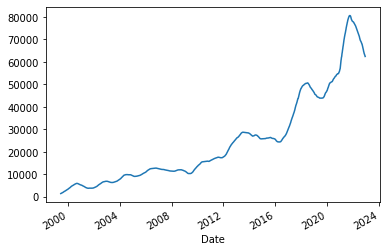

In [ ]:
se.rolling(200).mean().Close.dropna().plot()

In [ ]:
!pip install pyupbit -q

     |████████████████████████████████| 106 kB 7.3 MB/s 


In [ ]:
import pyupbit
# https://pyupbit.readthedocs.io/en/latest/
pyupbit.get_ohlcv()

,open,high,low,close,volume,value
2022-05-24 09:00:00,37436000.0,38000000.0,36725000.0,37827000.0,3823.785368,1.429107e+11
2022-05-25 09:00:00,37827000.0,38360000.0,37558000.0,37935000.0,3871.091337,1.471377e+11
2022-05-26 09:00:00,37937000.0,38230000.0,36394000.0,37662000.0,5202.304333,1.955051e+11
2022-05-27 09:00:00,37662000.0,37889000.0,36413000.0,36837000.0,4373.885371,1.620369e+11
2022-05-28 09:00:00,36862000.0,37373000.0,36613000.0,37034000.0,1931.845973,7.136116e+10
...,...,...,...,...,...,...
2022-12-05 09:00:00,22918000.0,23150000.0,22685000.0,22725000.0,3649.930863,8.377634e+10
2022-12-06 09:00:00,22729000.0,22885000.0,22701000.0,22821000.0,2826.972610,6.444548e+10
2022-12-07 09:00:00,22837000.0,22898000.0,22400000.0,22544000.0,3381.147876,7.637182e+10
2022-12-08 09:00:00,22544000.0,23000000.0,22484000.0,22918000.0,2658.301222,6.023865e+10
